# PANDAS
 Introduction to Pandas,
 Series,
 DataFrames,
 Missing Data,
 GroupBy,
 Merging,Joining,and Concatenating,
 Operations,
 Data Input and Output,

## Introduction to Pandas

In [3]:
import pandas as pd 
import numpy as np 

## Series

In [7]:
labels=['a','b','c','d']
my_data=[1,2,3,4]
arr= np.array(my_data)
e={'a':1,'b':2,'c':3,'d':4}

In [5]:
pd.Series(data=my_data)

0    1
1    2
2    3
3    4
dtype: int64

In [8]:
pd.Series(data=my_data, index= labels)

a    1
b    2
c    3
d    4
dtype: int64

In [9]:
# Can also call it:
pd.Series(my_data,labels)

a    1
b    2
c    3
d    4
dtype: int64

In [10]:
pd.Series(e)

a    1
b    2
c    3
d    4
dtype: int64

In [11]:
pd.Series([sum,len,print])

0      <built-in function sum>
1      <built-in function len>
2    <built-in function print>
dtype: object

In [12]:
s1=pd.Series([1,2,3,4],['US','India','China','UK'])
s1

US       1
India    2
China    3
UK       4
dtype: int64

In [13]:
s2= pd.Series([1,2,5,4],['US','India','Russia','Brazil'])
s2

US        1
India     2
Russia    5
Brazil    4
dtype: int64

In [14]:
s1['US']

1

In [15]:
s1[1]

2

In [16]:
s1[0]

1

In [17]:
s1+s2

Brazil    NaN
China     NaN
India     4.0
Russia    NaN
UK        NaN
US        2.0
dtype: float64

## Data Frames

In [18]:
from numpy.random import randn
np.random.seed(101)

In [19]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Indexing and Selection:

In [20]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [21]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [22]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

Dataframe columns are just series

In [23]:
type(df['W'])

pandas.core.series.Series

In [24]:
#Creating a new column:
df['new'] = df['W'] + df['Y']
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [25]:
# To remove a column:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [26]:
# To permanently remove the column from df
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [27]:
# Dropping a row: --> do not need to mention axis=0 as it is default.
df.drop('E',axis=0)  # to permanently make the change, add inplace=True.

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [28]:
# To know the shape of the data frame:
df.shape

(5, 4)

Two ways of selecting rows:
    loc and iloc

In [29]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [30]:
df.loc['E']

W    0.190794
X    1.978757
Y    2.605967
Z    0.683509
Name: E, dtype: float64

In [31]:
df.iloc[4]

W    0.190794
X    1.978757
Y    2.605967
Z    0.683509
Name: E, dtype: float64

In [32]:
df.loc['E','X']

1.9787573241128278

In [33]:
df.iloc[4,1]

1.9787573241128278

In [34]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditonal Selection:

In [35]:
# Using Conditional Operators:
df >0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [36]:
booldf = df>0
df[booldf]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [37]:
# Can also do it as:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [38]:
df[df['W']>0]  # Only get rows where the number is positive

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [39]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [40]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


In [41]:
df[(df['W']>0) & (df['Y'] > 1)] # For two conditions you can use | and & with parenthesis:

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


###  Index Details:
features: indexing, including resetting the index or setting it something else

In [42]:
# To Reset an index. To reset permanently: (inplace=True)
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [43]:
newind= 'CA NY MA OH IL'.split()
newind

['CA', 'NY', 'MA', 'OH', 'IL']

In [44]:
df['States']=newind
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,MA
D,0.188695,-0.758872,-0.933237,0.955057,OH
E,0.190794,1.978757,2.605967,0.683509,IL


In [45]:
# To set Index: # To permanently set it: (inplace=True)
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
MA,-2.018168,0.740122,0.528813,-0.589001
OH,0.188695,-0.758872,-0.933237,0.955057
IL,0.190794,1.978757,2.605967,0.683509


### Multi-Index and Index Hierarchy


In [46]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [47]:
df=pd.DataFrame(randn(6,2),hier_index,['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

In [48]:
# Calling from Multi-Index
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [49]:
# To call inside G1
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [50]:
# To place label Index Names:
df.index.names=['Groups','Num']
df

A         B
Groups Num                    
G1     1    0.302665  1.693723
       2   -1.706086 -1.159119
       3   -0.134841  0.390528
G2     1    0.166905  0.184502
       2    0.807706  0.072960
       3    0.638787  0.329646

In [51]:
# To grab a certain number:
df.loc['G2'].loc[3].loc['B']

0.32964629880452445

In [52]:
# Cross-section function: Use when we have multilevel index
df.xs(1,level='Num') #grabs the values of index 1

,A,B
Groups,,
G1,0.302665,1.693723
G2,0.166905,0.184502


## Missing Data

In [53]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [54]:
# drop columns with null values
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [55]:
df.dropna() # For rows

,A,B,C
0,1.0,5.0,1


In [56]:
df.dropna(thresh=2) # drops rows with 2 nan values

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [57]:
# To fill in the mising values:
df.fillna(value='Fill Value')

,A,B,C
0,1,5,1
1,2,Fill Value,2
2,Fill Value,Fill Value,3


In [58]:
# If you want to fill with the mean of the column:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## Groupby:
Groupby allows you to group together rows based off of a column and then perform some sort of aggregate function on them.

In [59]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df=pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [60]:
# Groupby company
bycomp=df.groupby('Company')

In [61]:
bycomp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [62]:
bycomp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


FB           AxesSubplot(0.1,0.559091;0.363636x0.340909)
GOOG    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
MSFT             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

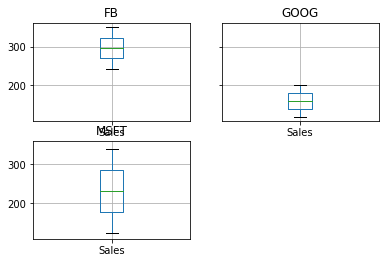

In [63]:
bycomp.boxplot()

In [64]:
bycomp.sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [65]:
# Can also use:
df.groupby('Company').sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [66]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [67]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [68]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [69]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [70]:
# To get a Transpose form of the above table:

df.groupby('Company').describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [71]:
# Further interested in a specific column:
df.groupby('Company').describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

## Merging, Joining and Concatenating

In [72]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [73]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [74]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


###  Concatenation
Concatenation basically glues together DataFrames.The dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together.

In [75]:
pd.concat([df1,df2,df3]) # mention axis=1 if you want to join along the columns

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [76]:
# By columns:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [77]:
# Example Dataframes:

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [78]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [79]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


###  Merging
The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [80]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [81]:
#Or to show a more complicated example:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [82]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [83]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [84]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [85]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Joining:
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [86]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [87]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [88]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Operations:


In [89]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values:

In [90]:
df['col2'].unique()

array([444, 555, 666])

In [91]:
len(df['col2'].unique()) # 3 unique values in column 2

3

In [92]:
# For the above method can also use:
df['col2'].nunique()

3

In [93]:
df['col2'].value_counts() #gives us the number of times a value is mentioned

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting from data

In [94]:
# Using conditional selection:
df[df['col1']>2]

,col1,col2,col3
2,3,666,ghi
3,4,444,xyz


In [95]:
df['col1']>2 # This command is a boolean series

0    False
1    False
2     True
3     True
Name: col1, dtype: bool

In [96]:
df[(df['col1']>2) & (df['col2']==444)] # Mulitple condition

,col1,col2,col3
3,4,444,xyz


### Apply Method

In [97]:
def times2(x):
    return x*2

In [98]:
# applying the function to our selected column
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [99]:
# Can also apply built in functions:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [100]:
df['col2'].apply(lambda x: x*2) # instead of writing a function, we can use lambda expression.

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

### Removing a column

In [101]:
df.drop('col1',axis=1) # axis=1 for a column , inplace=True to change it in dataframe

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [102]:
del df['col1'] # Permanently deletes a column
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Other Operations **

In [103]:
df.columns # Returns a list of columns in the dataframe

Index(['col2', 'col3'], dtype='object')

In [104]:
df.index # describes the index

RangeIndex(start=0, stop=4, step=1)

In [105]:
df.sort_values(by='col2') # sorts by specific column

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [106]:
df.isnull() # To check if null values are present or not

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [107]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Filling in NaN values with something else: **

In [108]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [109]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [110]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [111]:
# TO create Pivot Table: 3 main arguments(value=, index=, columns=)
df.pivot_table(values='D',index=['A','B'],columns=['C']) # A,B is a multi-level index

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

## Data Input and Output
* CSV
* Excel
* HTML
* SQL

### CSV 

** Input **

In [121]:
df = pd.read_csv('/Users/sirishpulijala/Desktop/Data Science Practice/Pandas/example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


** Output **

In [113]:
df.to_csv('/Users/sirishpulijala/Desktop/Data Science Practice/Pandas/my_output',index= False)

In [114]:
pd.read_csv('/Users/sirishpulijala/Desktop/Data Science Practice/Pandas/my_output')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### Excel Files

In [115]:
pd.read_excel('/Users/sirishpulijala/Desktop/Data Science Practice/Pandas/Excel_Sample.xlsx',sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [116]:
df.to_excel('/Users/sirishpulijala/Desktop/Data Science Practice/Pandas/Excel_Sample2',sheet_name='NewSheet')

ValueError: No engine for filetype: ''

### HTML

In [117]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [118]:
df[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
...,...,...,...,...,...,...
556,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
557,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
558,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
559,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


### SQL

The pandas.io.sql module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by SQLAlchemy if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python’s standard library by default. You can find an overview of supported drivers for each SQL dialect in the SQLAlchemy docs.

If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for backwards compatibility, but this is deprecated and will be removed in a future version). This mode requires a Python database adapter which respect the Python DB-API.

See also some cookbook examples for some advanced strategies.

The key functions are:
* read_sql_table(table_name, con[, schema, ...])
  * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])
  * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])
  * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])
  * Write records stored in a DataFrame to a SQL database.

In [119]:
from sqlalchemy import create_engine

In [120]:
engine= create_engine('sqlite:///:memory:')

In [122]:
df.to_sql('mytable',engine)

In [123]:
sql_df = pd.read_sql('mytable',con=engine)

In [124]:
sql_df

,index,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15
